# Capstone Project 
## Africa Soil Property Prediction Challenge 
### Brendan Connolly 08/09/18

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the African soil dataset
data = pd.read_csv("training.csv")

# Split off the target variables and place them into a dictionary, then drop from features set
target_dict = {'calcium':data['Ca']}
target_dict['phosphorous'] = data['P']
target_dict['pH'] = data['pH']
target_dict['organic_matter'] = data['SOC']
target_dict['sand'] = data['Sand']
data = data.drop(['Ca', 'P', 'pH', 'SOC', 'Sand'], axis=1)

# Success - Display the first record
display(data.head(n=1))

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,Topsoil


### Data Exploration
Gaining meaningful insights from a statistical analysis of this data set may be quite difficult.  My relative lack of knowledge in the area of spectroscopy is working against me here.  However, there are some things that I can do.  
- We can break down our data using the only categorical tag "Depth" to see if there is any heavy emphasis on either top or subsoil in the data.
- Another thing that I can do is calculate some very simple statistics for a subset of the light absorbtion columns to see if there are any that stick out as being abnormal.  Any abnormalities could be taken into account when analysing or possibly even preprocessing the data

In [2]:
# Percentage of records in training set that are in the "Topsoil" category
perc_topsoil = 100 * (data.query("Depth == 'Topsoil'").PIDN.count()) / float(data.PIDN.count())
print("Topsoil/Subsoil percentages: {}%-{}%".format(perc_topsoil, 100 - perc_topsoil))

Topsoil/Subsoil percentages: 50.2160760588%-49.7839239412%


In [3]:
# Basic statistical analysis of a subset of columns

# Get all headers
col_headers = data.columns
# Random subset
subset = np.random.choice(col_headers, size=20)

# Calculate statistics and report for each of the chosen subset
subDF = data[subset]
subDF.describe()

,m6948.34,m6786.35,m6088.24,m5043,m4171.32,m5953.24,m4801.94,m2269.83,m4441.31,m4362.24,m6786.35,m7476.75,m1968.99,m4570.52,m4798.08,m3874.33,m2221.62,m7212.55,m7031.27,m5474.98
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.264065,0.263923,0.256524,0.305938,0.364507,0.257461,0.292953,0.666364,0.320279,0.328545,0.263923,0.235256,1.009803,0.328060,0.293048,0.446136,0.693569,0.255534,0.266401,0.263463
std,0.113775,0.113684,0.113189,0.117521,0.120335,0.113251,0.113933,0.127849,0.114732,0.115555,0.113684,0.114913,0.121525,0.115148,0.113906,0.135683,0.125747,0.113315,0.113772,0.113170
min,-0.019934,-0.016243,-0.013183,0.026003,0.064658,-0.011647,0.020798,0.328415,0.037642,0.042519,-0.016243,-0.055382,0.564332,0.043921,0.020862,0.114085,0.365633,-0.033671,-0.021092,-0.003256
25%,0.187441,0.185296,0.180194,0.228207,0.281542,0.180148,0.217870,0.571499,0.246712,0.253620,0.185296,0.160848,0.933683,0.247083,0.217954,0.346432,0.603084,0.179779,0.190372,0.186800
50%,0.270243,0.269765,0.261968,0.309884,0.378906,0.262740,0.299655,0.680892,0.329181,0.339288,0.269765,0.244274,1.006310,0.341317,0.299722,0.463243,0.709005,0.264532,0.273057,0.268652
75%,0.332708,0.331950,0.321972,0.375182,0.443396,0.323114,0.360105,0.759744,0.390163,0.400442,0.331950,0.304905,1.080710,0.403175,0.360080,0.544014,0.784666,0.324997,0.335333,0.327897
max,0.759737,0.761770,0.756745,0.797262,0.790106,0.757124,0.762603,0.971608,0.753914,0.756785,0.761770,0.718900,1.446760,0.765125,0.762356,0.868140,1.009000,0.739244,0.758178,0.758403


**Results of Exploration:**

- We can see that there is a 50-50 split for the soil type so no need to tak anything else into account there.
- Similarly, by looking at the simple statistics there doesn't seem to be any need to remove outliers there.  One thing to note is, looking at the means, that there seems to be more absorbtion at the lower wavelegths.  This indicates that it would be a good idea to normalise the column values before doing any analysis

### Exploratory Visualization:

In this section I will plot the absorbtion across all of the given wavelengths for a random sub-sample of data points.  This is a good visualisation as it will give us an idea which wavelengths we are most likely to get interesting results from.  It can give also us an idea of any general trends in the data.  For example, are there peaks at any particular wavelength?  Or, does every sample follow the same general curve shape with only slight differences at certain points?  Even the question: is the absorbtion of light across the given wavelengths continuous or does it jump around randomly?

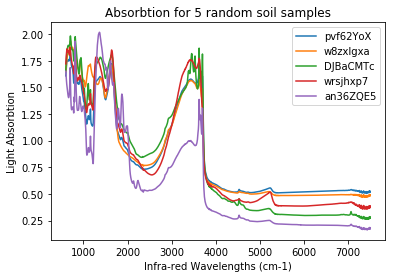

In [4]:
import re

n_samples = 5

#Get random rows from data
randIdx = [int(x) for x in len(data) * np.random.random_sample(n_samples,)]
samples = data.iloc[randIdx]

#Make the PIDN the index column
samples.set_index('PIDN', drop=True, inplace=True)

#Pick out only the spectral columns
specRegex = re.compile('m\d+.\d+')
specCols = specRegex.findall(" ".join(data.columns))
samples = samples[specCols]

#Transpose the samples dataframe for display in graph
samples = samples.transpose()

#Make a new column with the wavelengths as actual numbers
wavelengths = [float(x[1:]) for x in samples.index.values]
samples['wavelengths'] = wavelengths

#display(samples)
sampleIDs=samples.columns[:-1]
for column in sampleIDs:
    plt.plot(samples['wavelengths'], samples[column])
plt.xlabel('Infra-red Wavelengths (cm-1)')
plt.ylabel('Light Absorbtion')
plt.title('Absorbtion for 5 random soil samples')
plt.legend()
plt.show()

**Results:**

The above code plots random soil samples but, from what I have seen, the general trend is the same so you should see a similar graph to me.

One thing to note is that there seems to be a general trend that each of the samples follow.  There are major peaks in absorbtion at ~1000cm-1 and ~3600cm-1.  There is a local trough at around 2300cm-1.  The absorbtion patterns can be quite unpredictable from 700-1200cm-1 while after 2500cm-1, they all follow a fairly rigid pattern.  The zones described here could well be good indicators for our target variables so I will keep them in mind as I go through the rest of this exercize

### Data Preprocessing

In this section I will implement the preprocessing techniques outlined in the capstone report

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

# Change the depth feature to 1s and 0s
encoded_data = data.copy(deep=True)
encoded_data['Depth'] = encoded_data['Depth'].apply(lambda x: {'Subsoil':0, 'Topsoil':1}[x])
# Change index to ID column
encoded_data.set_index('PIDN', drop=True, inplace=True)

# Normalise the spectral columns to lie between 0 and 1 
normalised_data = pd.DataFrame(data = encoded_data)
scaler = MinMaxScaler()
# All columns apart from the spectral columns have alreadyy been mean centered so there is no great need to adjust them
normalised_data[specCols] = scaler.fit_transform(normalised_data[specCols])

def select_features(all_features, target_dict, n=50):
    target_selected_columns = {}
    #Apply feature selection for each of the target variables independantly
    for targ in target_dict.keys():
        feature_selector = SelectKBest(score_func=f_regression,k=n)
        feature_selector.fit(all_features, target_dict[targ])
        target_selected_columns[targ] = list(all_features.columns[list(feature_selector.get_support(indices=True))])
    return target_selected_columns

### Implementation

In this section I will apply the machine learning techniques described in the capstone report to build models to predict the 5 target variables

In [6]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

# Since I need to train for and predict more than one variable, I'll take a different split of the data for each target
# For this purpose I will define data_dict, this is a dictionary of dictionaries
# Each target has it's own inner dictionary
# Each inner dictionary carries the train + test features and results for one of the target variables
def split_data(all_data, target_dict, features_dict):
    data_dict={}
    for targ in target_dict.keys():
        d = {}
        # Trim the features data down using the selected columns from before
        data_for_target = all_data[features_dict[targ]]
        d['trainFeatures'], d['testFeatures'], d['trainTargets'], d['testTargets'] = train_test_split(data_for_target,
                                                        target_dict[targ], 
                                                        test_size = 0.2, 
                                                        random_state = 9385)
        data_dict[targ] = d
    return data_dict

num_selected_cols = 50
features = select_features(normalised_data, target_dict, num_selected_cols)
data_dict = split_data(normalised_data, target_dict, features)

In [7]:
# Random Forrest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Store each of the validation scores for each of the target variables in a dictionary
# We won't bother storing the actual models as they will be thrown out and improved on in the next section
scores_dict = {}
# Initialise the forrest scores dictionary
scores_dict['forrest'] = {}
for targ in data_dict.keys():
    regr = RandomForestRegressor(random_state=2965297, n_estimators=50)
    target_data = data_dict[targ]
    scores = cross_val_score(regr, 
                             target_data['trainFeatures'], 
                             target_data['trainTargets'], 
                             cv=10, 
                             scoring='neg_mean_squared_error')
    scores_dict['forrest'].update({targ:scores.mean()})

In [8]:
# Neural Net Regressor
# Import the neccessary artifacts
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor

# Base model
def model_builder(layer_1_dim):
    model = Sequential()    
    model.add(Dense(layer_1_dim, input_dim=layer_1_dim, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Initialise the net scores dictionary
scores_dict['net'] = {}
# Get validation scores for neural net models and save to the scores dictionary
for targ in data_dict.keys():
    # Use the "num_selected_cols" variable from before to define the shape of the first layer of the net
    regr = KerasRegressor(build_fn=model_builder, layer_1_dim=num_selected_cols, epochs=40, verbose=0)
    target_data = data_dict[targ]
    scores = cross_val_score(regr,
                             target_data['trainFeatures'], 
                             target_data['trainTargets'],
                             cv=10,
                             scoring='neg_mean_squared_error')
    scores_dict['net'].update({targ:scores.mean()})

Using TensorFlow backend.


### Refinement

In this section I will change the various parameters in order to try and improve validation score.  Once the validation score has been improved to an acceptable level, the final models will be saved for each target variable

In [9]:
# Print the validation scores (average across all targets) for both models
print "The average error for the Random Forrest method was: {}".format(np.mean(scores_dict['forrest'].values()))
print "The average error for the Neural Net method was: {}".format(np.mean(scores_dict['net'].values()))

The average error for the Random Forrest method was: -0.473998488812
The average error for the Neural Net method was: -0.494581291742


In [10]:
# Improved Random Forrest Regressor
# Improvements made were:
#  1. To add some parameters to the regressor model
#  2. Added a max depth parameter
#  3. Added a min samples split parameter

num_selected_cols = 100
improved_features = select_features(normalised_data, target_dict, num_selected_cols)
improved_data_dict = split_data(normalised_data, target_dict, improved_features)

#Initialise dictionaries for scores and models
improved_scores_dict = {}
robustness_measures_dict = {}
final_model_dict = {}
# Initialise the forrest scores dictionary
improved_scores_dict['forrest'] = {}
robustness_measures_dict['forrest'] = {}
final_model_dict['forrest'] = {}
for targ in improved_data_dict.keys():
    regr = RandomForestRegressor(random_state=479779, 
                                 n_estimators=50,
                                 # Adding max depth and min_samples_split to reduce overfitting
                                 max_depth=20,
                                 min_samples_split=10
                                )
    target_data = improved_data_dict[targ]
    scores = cross_val_score(regr, 
                             target_data['trainFeatures'], 
                             target_data['trainTargets'], 
                             cv=10, 
                             scoring='neg_mean_squared_error')
    #Save the scores for all folds so that the robustness of the model can be examined
    robustness_measures_dict['forrest'].update({targ:scores})
    improved_scores_dict['forrest'].update({targ:scores.mean()})
    final_model_dict['forrest'].update({targ:regr})

In [11]:
# Improved Neural Net Stage 1
# Improvements made:
#  1. Widened the network architecture (widening is achieved by increasing the feature set in my set up)
#  2. Deepened the network architecture 
#  3. Added dropout layers to deal with overfitting
# Result: Mean squared error was actually worse with this model

# Improved Neural Net Stage 2
# Improvements made:
#  1. Changed the activations from relu to tanh
#  2. Took 13 nodes out of the second to last layer

from keras.layers import Dropout

# Base model
def improved_model_builder(layer_1_dim):
    model = Sequential()    
    model.add(Dense(layer_1_dim, input_dim=layer_1_dim, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(12, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Initialise the net scores dictionary and final model dict
improved_scores_dict['net'] = {}
robustness_measures_dict['net'] = {}
final_model_dict['net'] = {}

# Get validation scores for neural net models and save to the scores dictionary
for targ in improved_data_dict.keys():
    # Use the "num_selected_cols" variable from before to define the shape of the first layer of the net
    regr = KerasRegressor(build_fn=improved_model_builder, layer_1_dim=num_selected_cols, epochs=50, verbose=0)
    target_data = improved_data_dict[targ]
    scores = cross_val_score(regr,
                             target_data['trainFeatures'], 
                             target_data['trainTargets'],
                             cv=10,
                             scoring='neg_mean_squared_error')
    improved_scores_dict['net'].update({targ:scores.mean()})
    robustness_measures_dict['net'].update({targ:scores})
    final_model_dict['net'].update({targ:regr})

In [12]:
print "The average error for the Random Forrest method was: {}".format(np.mean(improved_scores_dict['forrest'].values()))
print "The average error for the Neural Net method was: {}".format(np.mean(improved_scores_dict['net'].values()))

The average error for the Random Forrest method was: -0.432118542088
The average error for the Neural Net method was: -0.478087080456


### Final tuning and Predictions

In this final section of the implementation I will decide how to weight the results from the two models I have built.  The weights will be applied per target variable and will be based on that model's ability to predict the given target variable

In [13]:
# Scores for individual target variables for the random forrest
print improved_scores_dict['forrest']

{'calcium': -0.1660207591905012, 'pH': -0.23202710397961263, 'organic_matter': -0.48569714060588487, 'sand': -0.34870000022864056, 'phosphorous': -0.9281477064375485}


In [14]:
# Scores for individual target variables for the neural net
print improved_scores_dict['net']

{'calcium': -0.21807627439971822, 'pH': -0.3022052347509357, 'organic_matter': -0.641967318248227, 'sand': -0.38904827792901864, 'phosphorous': -0.8391382969499295}


We see above that the random forrest regressor beats the neural net for almost all of the target variables.  For this reason it will get a higher weighting on all but the phosphorous prediction.  To get the final weights I will just compute a ratio of the inverted errors.  Thus any target with a lower error will get a higher weight

In [15]:
# Compute the weights based on the cross-validation scores
weights_dict = {}
for targ in target_dict.keys():
    weights_dict[targ] = [(1/improved_scores_dict['forrest'][targ])/(1/improved_scores_dict['net'][targ]), 1.0]

# Using the weights and our models, make final predictions
final_predictions_dict = {}
for targ in weights_dict.keys():
    targ_data = improved_data_dict[targ]
    for_model = final_model_dict['forrest'][targ]
    net_model = final_model_dict['net'][targ]
    # First the models have to be fitted to the training data
    for_model.fit(targ_data['trainFeatures'], targ_data['trainTargets'])
    net_model.fit(targ_data['trainFeatures'], targ_data['trainTargets'])
    # Then, predictions can be made
    for_pred = for_model.predict(targ_data['testFeatures'])
    net_pred = net_model.predict(targ_data['testFeatures'])
    final_predictions_dict[targ] = [np.average(x, weights=weights_dict[targ]) for x in zip(for_pred, net_pred)]

### Model Evaluation

This section will provide an implementation of the evaluation metric as described in the projet report.  The predictions obtained in the previous section will be compared against the actual results via the aforementioned evaluation metric.  The results of this step will provide the basis for my overall evaluation of the model

In [16]:
# Evaluation metric: mean columnwise root mean squared error
def MCRMSE(predictions, results):
    target_errors = []
    for targ in predictions.keys():
        errors = [np.square(y-x) for x,y in list(zip(predictions[targ], results[targ]))]
        target_errors.append(np.sqrt(np.mean(errors)))
    return np.mean(target_errors)

# Re-jig the testTargets part of the split data to the form that we need for the MCRMSE function
results = {}
for targ in improved_data_dict.keys():
    results[targ] = improved_data_dict[targ]['testTargets']

print "The overall error achieved by this model is: {}".format(MCRMSE(final_predictions_dict, results))

The overall error achieved by this model is: 0.769472723075


### Robustness Evaluation

In [17]:
# Measure the robustness of the models by examining the ranges of accuracy from cross validation
for alg, d in robustness_measures_dict.iteritems():
    print "Showing results for the {} algorithm".format(alg)
    print ""
    for targ, scores in d.iteritems():
        print "All scores for {}".format(targ)
        print scores
        print "Standard deviation: {}".format(np.std(scores))
        print ""
    print ""

Showing results for the net algorithm

All scores for calcium
[-0.28718664 -0.32835136 -0.11185552 -0.17693683 -0.13403711 -0.12759216
 -0.14889344 -0.45912398 -0.2741369  -0.13264881]
Standard deviation: 0.108854490422

All scores for pH
[-0.33560138 -0.2344647  -0.25470049 -0.26026126 -0.31808395 -0.35860246
 -0.22186258 -0.37926358 -0.31131671 -0.34789523]
Standard deviation: 0.0526463551873

All scores for organic_matter
[-0.65260526 -0.54958376 -0.37874387 -0.69050535 -0.83551349 -0.61472656
 -0.54749158 -0.59549533 -0.73351193 -0.82149606]
Standard deviation: 0.130456461193

All scores for sand
[-0.39706785 -0.34901175 -0.28019144 -0.52435059 -0.36581264 -0.3465142
 -0.33501402 -0.45808261 -0.348635   -0.48580268]
Standard deviation: 0.0726999967046

All scores for phosphorous
[-0.41897025 -1.0268877  -0.85900093 -0.21372908 -0.88321347 -0.27394548
 -0.37822816 -0.47145672 -2.18736541 -1.67858578]
Standard deviation: 0.616013319233


Showing results for the forrest algorithm

All

__Free Form Visual__

I will average the spectral details of all the samples and plot in a single graph.  This will be overlayed with the specta deemed most important when predicting each of the target variables.  This information will be taken from the feature selection step.  This should hopefully give some insight into trends that the algorithms picked up as part of the process

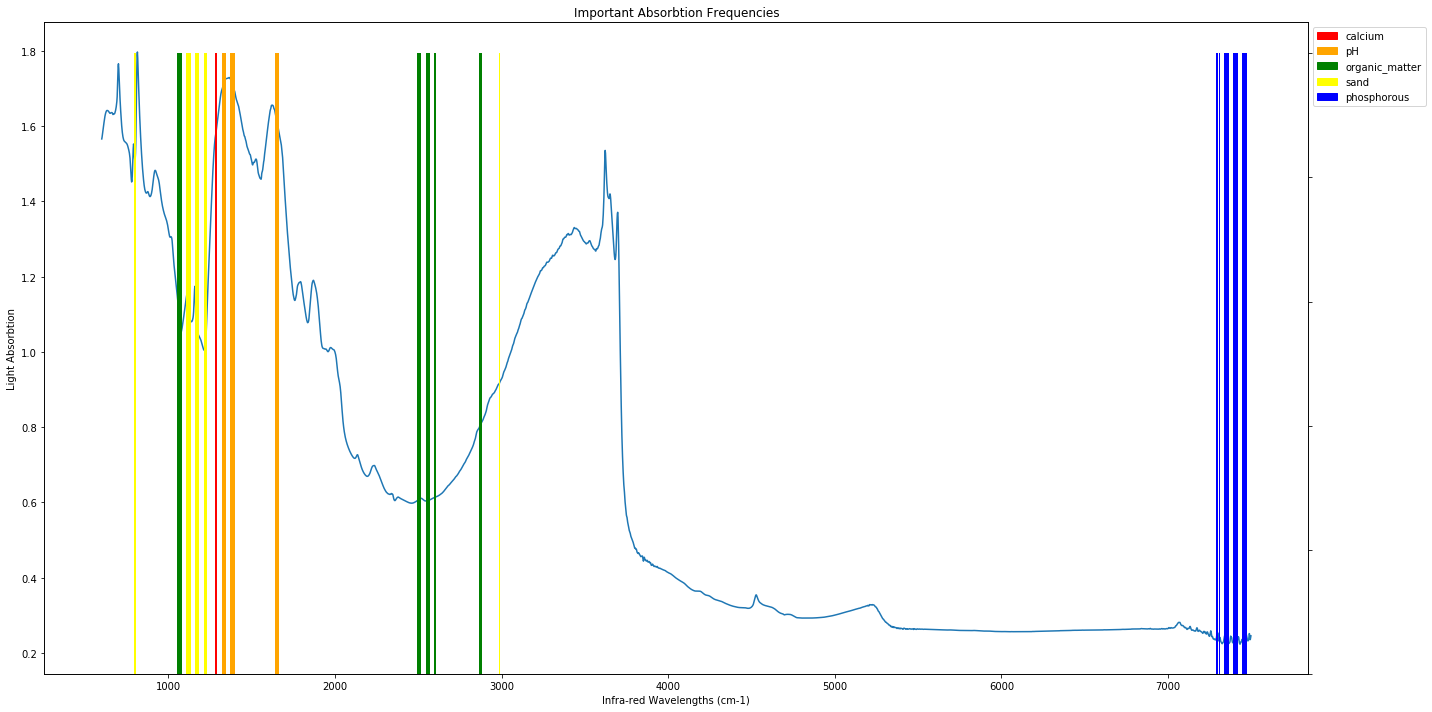

In [18]:
import matplotlib.patches as mpatches

# Re-used variables
#   wavelengths - exhaustive set of all wavelengths in float form rather than their label form
#   data - data from before normalization and splitting
#   specCols - Set of columns from the data that are spectral in nature
#   improved_features - Set of features used for the the refined solution above

# New figure
fig,ax1 = plt.subplots(figsize=(20,10))

# Get medians of all samples
spectralMeds = [data[col].mean() for col in specCols]
# Plot medians on a new chart
ax1.plot(wavelengths, spectralMeds)
ax1.set_ylabel('Light Absorbtion')
ax1.set_xlabel('Infra-red Wavelengths (cm-1)')
ax1.set_title('Important Absorbtion Frequencies')
#Add new y-axis
ax2 = ax1.twinx()
ax2.yaxis.set_ticklabels([])

coloursDict = {'calcium':'red', 'phosphorous':'blue', 'pH':'orange', 'organic_matter':'green', 'sand':'yellow'}

for targ in improved_features.keys():
    # Get only the spectral columns from the latest set of selected features per target
    targSpecCols = specRegex.findall(" ".join(improved_features[targ]))
    # Change into actual floats
    targWLs = [float(x[1:]) for x in targSpecCols]
    # Make lists of 1's and zeros.  1's where a spectral line is relevant for a target 0 where not
    barVals = [1 if y in targWLs else 0 for y in wavelengths]
    # Plot these on a separate 0-1 y-axis 
    ax2.bar(wavelengths, barVals, width=1.0, color=coloursDict[targ])
    
# Build the graph legend
patches = [mpatches.Patch(color=colour, label=targ) for targ,colour in coloursDict.iteritems()]
plt.legend(bbox_to_anchor=(1,1), handles=patches)

fig.tight_layout()
plt.show()